In [1]:
from __future__ import absolute_import, print_function, unicode_literals
from importlib import reload
import pandas as pd
import os
import repackage
from pprint import pprint
repackage.up(2)
import data.microarray_2018_03_21.data as d1
import spot2intensity.ui_grid as ui
from utils import ensure_dir
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_adaptive,sobel
from skimage import filters
from PIL import Image
from functools import reduce
from PIL.ImageOps import autocontrast, equalize
import spot2intensity.spot2intensity as sp
from skimage import feature, exposure, segmentation
#from skimage.segmentation import inverse_gaussian_gradient
                                  
from scipy.ndimage import gaussian_filter


In [8]:
reload(sp)

<module 'spot2intensity.spot2intensity' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/spot2intensity/spot2intensity.py'>

In [9]:
Cols = d1.load_data()

In [10]:

c = Cols['2018_03_21_slide_39']
c.dump_pickel()

<2018_03_21_slide_39> is beeing pickeled
Claculating grid starting at:(84.0,141.0)


In [11]:
c1 = sp.Spots.load_pickel(c)

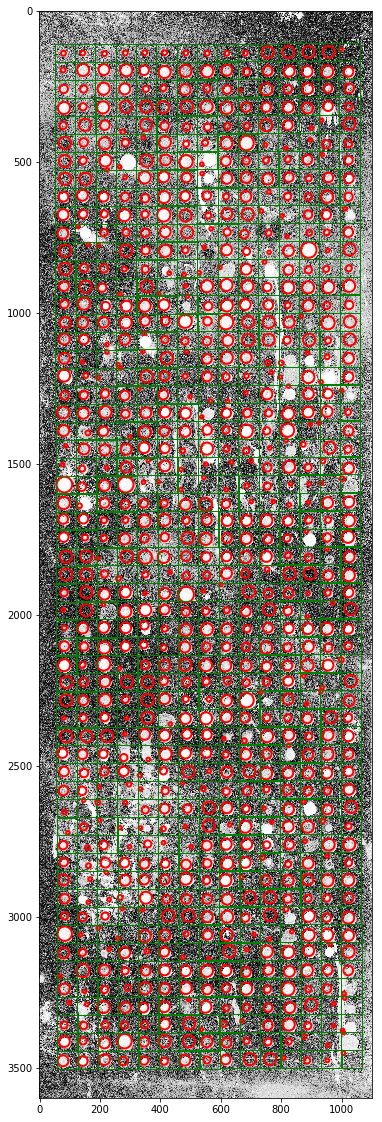

In [12]:
c1.plot_grid(on="a_im",figsize=(15,20))

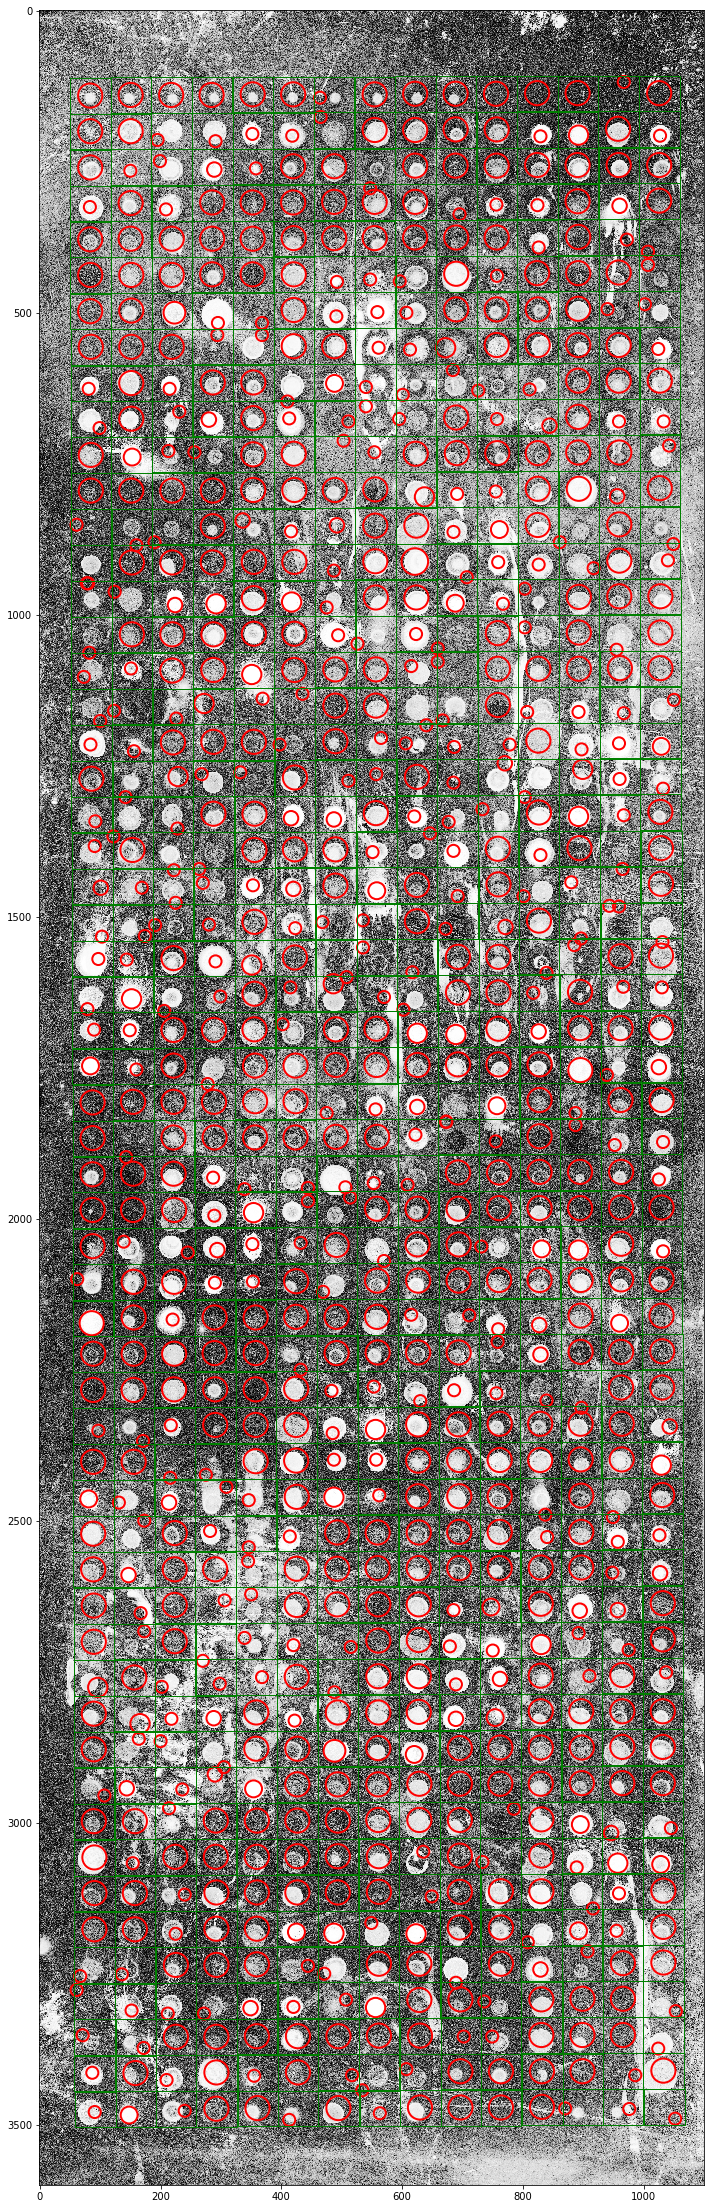

In [30]:
c1.plot_grid(on="a_im",figsize=(15,40))

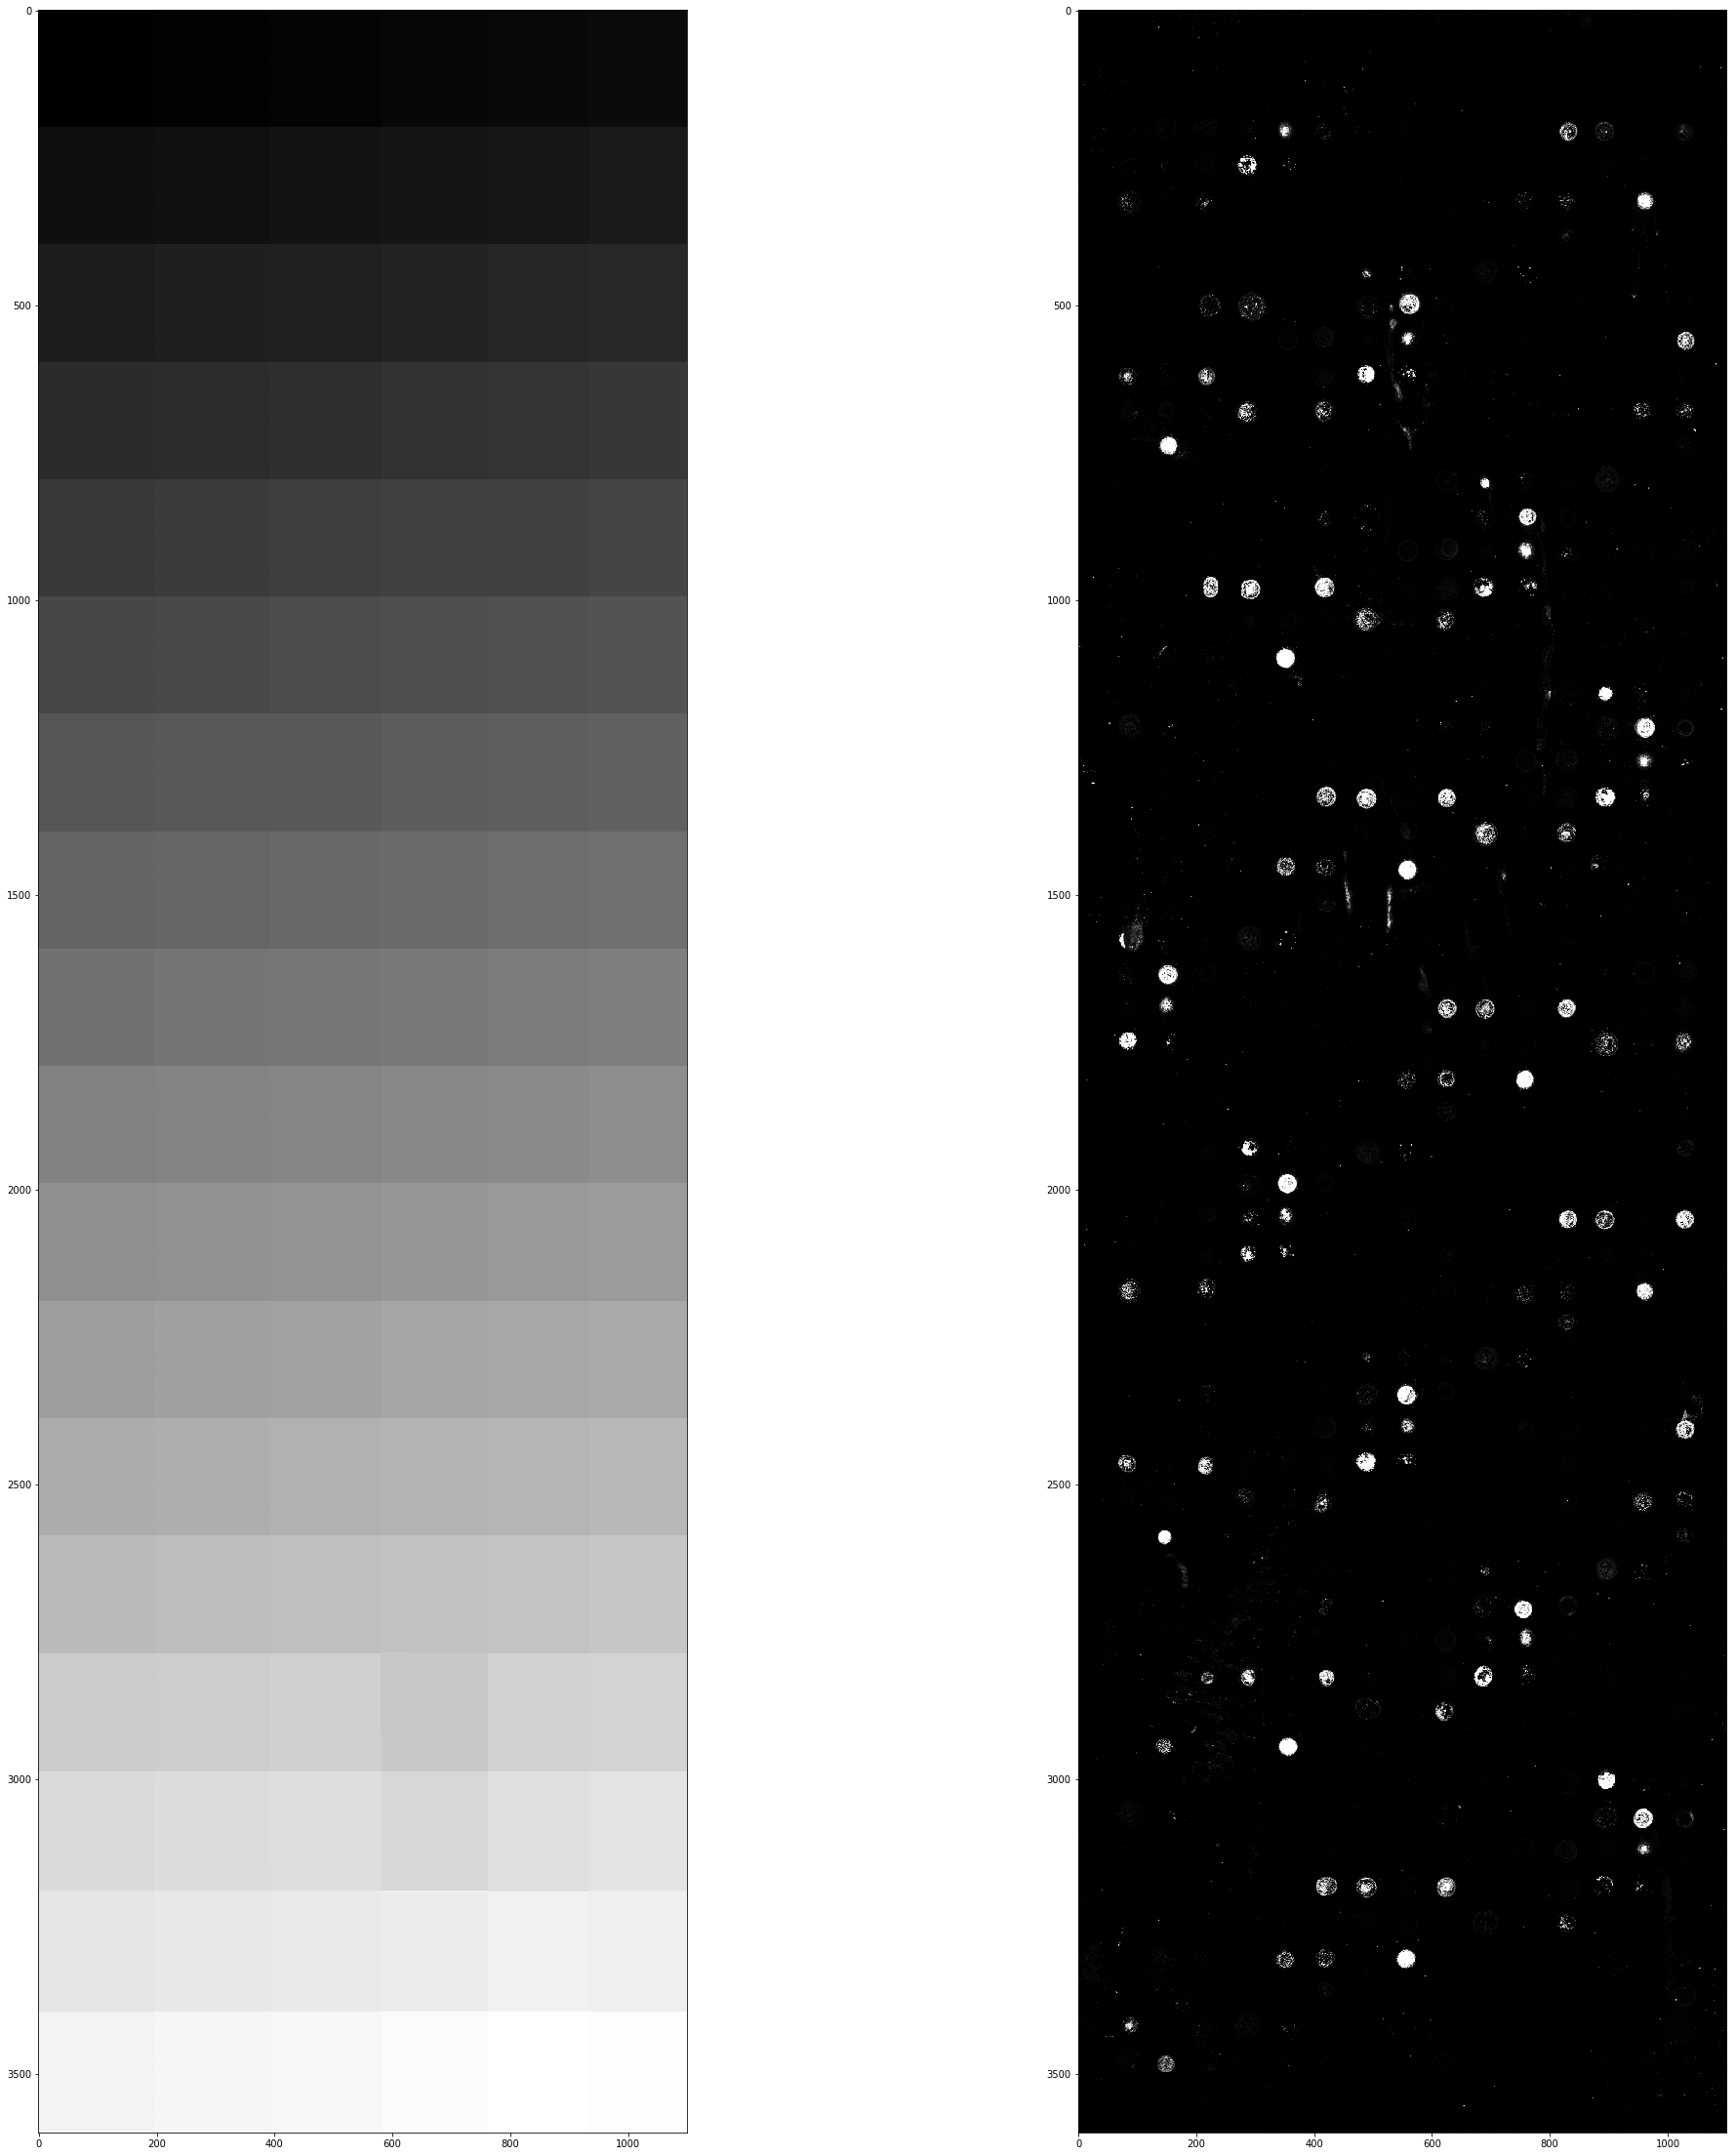

In [77]:
im = np.asarray(c.tifs_a[-1])
block_size = 401
#binary_adaptive = threshold_adaptive(im, block_size, offset=10)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(35, 40))
axes[0].imshow( segmentation.slic(exposure.equalize_hist(im),),cmap="gray")
axes[1].imshow(im,cmap="gray")

plt.show()

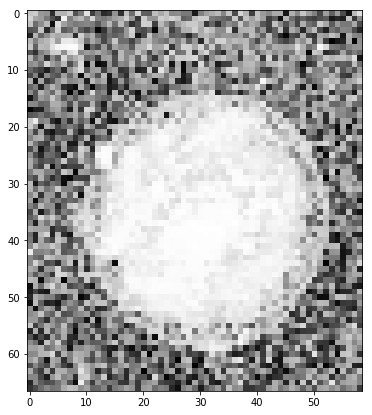

In [36]:
from skimage.feature import blob_dog, blob_log, blob_doh

equilized_image = exposure.equalize_hist(im)
delta_x = int(c.grids[-1].abs_horizontal_spacing)
delta_y = int(c.grids[-1].abs_vertical_spacing)
x,y = c.grids[-1].points[47]
x = int(x)
y = int(y)
rec = sp.create_patches((x, y), delta_x, delta_y)
x0, y0 = rec.xy
x0 = int(x0)
y0 = int(y0)
if x0 < 0:
    x0 = 0
if y0 < 0:
    y0 = 0

img = equilized_image[y0:y0 + delta_x, x0:x0 + delta_y]
edges = filters.sobel(img)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)

#plt.imshow(segmentation.morphological_chan_vese(spot_imag_eq))

array([[0.7743553 , 0.79990429, 0.59942475, ..., 0.075625  , 0.73355278,
        0.8713553 ],
       [0.83136237, 0.64875126, 0.61699394, ..., 0.76574949, 0.22364773,
        0.5391702 ],
       [0.76574949, 0.42787525, 0.55001313, ..., 0.48032601, 0.66301692,
        0.31248485],
       ...,
       [0.528025  , 0.528025  , 0.28267677, ..., 0.6560053 , 0.69990202,
        0.51658687],
       [0.15460934, 0.55001313, 0.37142576, ..., 0.66301692, 0.66301692,
        0.528025  ],
       [0.20926111, 0.29757424, 0.42787525, ..., 0.5391702 , 0.60832121,
        0.23819773]])

/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


0.7708333333333336


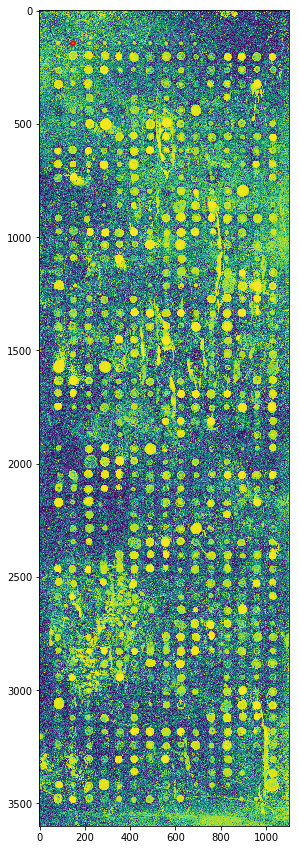

In [322]:
from skimage.morphology import disk

x,y = c.grids[-1].points[1]
x = int(x)
y = int(y)
rec = sp.create_patches((x, y), delta_x, delta_y)
x0, y0 = rec.xy
x0 = int(x0)
y0 = int(y0)
if x0 < 0:
    x0 = 0
if y0 < 0:
    y0 = 0

img_eq = equilized_image[y0:y0 + delta_x, x0:x0 + delta_y]
img = im[y0:y0 + delta_x, x0:x0 + delta_y]

img_seg = segmentation.felzenszwalb(img, scale=0.11,sigma=1,min_size=100)
img_seg_eq = segmentation.felzenszwalb(img_eq, scale=0.1,sigma=1,min_size=100)
#img_seg = segmentation.slic(img, sigma=2,convert2lab=False,slic_zero=False)
#img_seg_eq = segmentation.slic(img_eq, sigma=2, convert2lab=False,spacing=[2, 1, 1])
#snake1 = segmentation.active_contour(filters.gaussian(img, 3), img)
#snake2 = segmentation.active_contour(filters.gaussian(img_eq, 3), img)
#axes[1].plot(snake1[:, 0], snake1[:, 1], '-b', lw=3)
#axes[3].plot(snake2[:, 0], snake2[:, 1], '-b', lw=3)

f_img = filters.gaussian(img_seg_eq, sigma=3)

fig , axes = plt.subplots(ncols=1, nrows=1, figsize=(15,15))
#axes[0].imshow(img, cmap="gray")
#axes[1].imshow(img_eq, cmap="gray")
#axes[2].imshow(feature.canny(filters.gaussian(img_eq, sigma=3)), cmap="gray")
#axes[3].imshow(feature.canny(f_img), cmap="gray")
#axes[3].imshow( filters.median(img_eq, disk(1)), cmap="gray")

cy,cx,r,a= sp.find_circle_coordinates(img_eq)
circ = sp.create_circle_patches((cx+x0,cy+y0), r)
axes.imshow(equilized_image)
axes.add_patch(circ)
print(a)
plt.show()

In [333]:
sp = c.create_values()

Claculating grid starting at:(84.0,141.0)


In [334]:
sp


{'circle_qual': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.5624999999999999,
  0,
  0,
  0,
  0,
  0,
  0,
  0.7708333333333327,
  0,
  0,
  0,
  0,
  0,
  0,
  0.510416666666667,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.5250000000000001,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.7916666666666657,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.7000000000000003,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.4583333333333336,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.5250000000000001,
  0,
  0,
  0,
  0,
  0,
  0,
  0.4999999999999997,
  0.5250000000000001,
  0,
  0.5555555555555555,
  0,
  0,
  0,
  0.7499999999999996,
  0.43749999999999983,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.4999999999999998,
  0,
  0.5416666666666665,
  0,
  0.4250000000000001

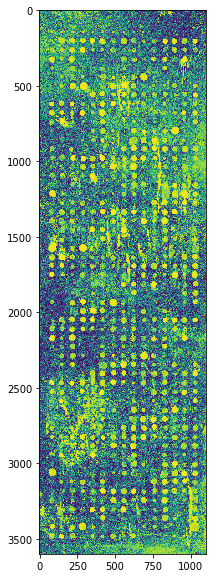

In [315]:
plt.figure( figsize=(10,10))
plt.imshow(equilized_image,)
plt.

In [260]:
def find_circle_coordinates(image):

    pic = copy.deepcopy(image)
    #img_seg_eq = segmentation.felzenszwalb(pic, scale=0.1, sigma=1, min_size=100)
    pic = feature.canny(filters.gaussian(pic, sigma=3))
    edges = feature.canny(pic)
    # Detect two radii
    hough_radii = np.arange(4, 40, 2)
    hough_res = hough_circle(edges, hough_radii)
    # Select the most prominent  circle:
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, min_xdistance=hough_radii.min(),
                                               min_ydistance=hough_radii.min(),
                                               total_num_peaks=1)
    if len(cx) == 0 :
        radii = [20]
        accums = [0]
        x,y = image.shape
        cy = [y/2]
        cx = [x/2]

    return cy[0] , cx[0], radii[0], accums[0]

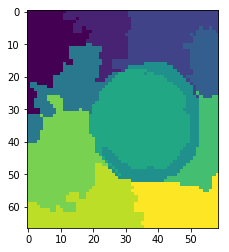

In [182]:
plt.imshow(segmentation.watershed(img_seg_eq,20))
plt.imshow(img_seg_eq)
plt.show()

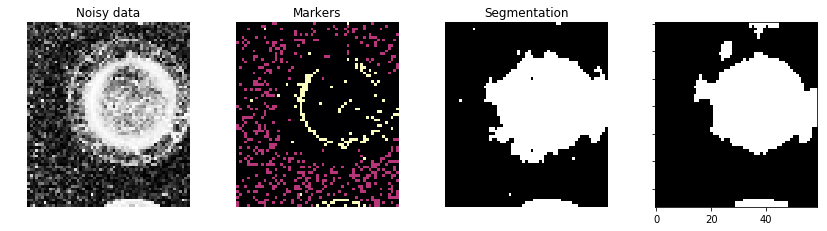

In [89]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(12, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(img, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma', interpolation='nearest')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('Segmentation')
ax4.imshow(coins_cleaned,cmap='gray')
fig.tight_layout()
plt.show()

In [96]:
label_objects, nb_labels = ndi.label(ndi.binary_fill_holes(segmentation - 1))
sizes = np.bincount(label_objects.ravel())
print(sizes.max())
mask_sizes = sizes.imax()
mask_sizes[0] = 0 
coins_cleaned = mask_sizes[label_objects]

2749


AttributeError: 'numpy.ndarray' object has no attribute 'imax'

In [ ]:
img = gaussian( exposure.equalize_hist(im), 2)

In [22]:
from skimage import exposure
import numpy as np
def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

In [23]:
 histogram_equalize(im)

array([[0.02270025, 0.09957677, 0.06067727, ..., 0.01770758, 0.00607121,
        0.16064672],
       [0.19037374, 0.07628813, 0.20556414, ..., 0.00412424, 0.00125051,
        0.00502955],
       [0.04287677, 0.00857677, 0.03181364, ..., 0.00125051, 0.06067727,
        0.11225909],
       ...,
       [0.83949899, 0.87061995, 0.86023561, ..., 0.93566086, 0.93680253,
        0.95602374],
       [0.84202045, 0.87317424, 0.79195354, ..., 0.93093889, 0.95252172,
        0.95957424],
       [0.84607803, 0.84993106, 0.89362475, ..., 0.92944369, 0.96053889,
        0.96528283]])